<a href="https://colab.research.google.com/github/Viviankatheu/Financial-Incusion-of-East-Africa/blob/main/Moringa_Data_Science_Core_W2_Independent_Project_2019_06_Vivian_Katheu_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Data Analysis

## 1. Defining the Question

### a) Specifying the Data Analytic Question

To figure out how we can predict which individuals in Kenya, Rwanda, Uganda and Tanzania are most likely to have or use a bank account.

### b) Defining the Metric for Success

The Random Forest Algorithm should give me atleast 85% accuracy.

### c) Understanding the context

Financial Inclusion is one of the main obstacles to economic and human development in Africa. Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Access to bank accounts is an essential contributor to long-term economic growth. This analysys sets out to figure out how we can predict which individuals are most likely to have or use a bank account in Kenya, Rwanda, Uganda and Tanzania between 2016 - 2018.

### d)Recording the Experimental Design

I'm going to perform exploratory data analysis i.e. univariate, bivariate and multivariate analysis and plot visualizations for the same statistics.

### e) Data Relevance

Country - Country the interviwee is in

Year - Year the survey was done

Unique id - Unique identifier for each interviewee

Location Type  -Type of location :Rural , Urban

Cellphone Access  - If interviewee has access to a cellphone: Yes, No

Household size - Number of people living in one house

Age of Respondent - The age of the interviewee

Gender of respondent - Gender of interviewee: Male, Female

Relationship with head - The interviewee relationship with the head of the house

Marital status - The martial status of the interviewee

Education_level - Highest level of education

Job type - Type of job interviewee has

## 2. Reading the Data

In [343]:
# Loading the Data from the source 

#Dataset: http://bit.ly/FinancialDataset 
#Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

financial_df = pd.read_csv('http://bit.ly/FinancialDataset')


## 3. Checking the data


In [344]:
#Determining the no. of records in our dataset

financial_df.shape

(23524, 13)

In [345]:
# Previewing the top of our dataset
financial_df.head(10)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
5,Kenya,2018,uniqueid_6,No,Rural,No,7.0,26.0,Female,Spouse,Married/Living together,Primary education,Informally employed
6,Kenya,2018,uniqueid_7,No,Rural,Yes,7.0,32.0,Female,Spouse,Married/Living together,Primary education,Self employed
7,Kenya,2018,uniqueid_8,No,Rural,Yes,1.0,42.0,Female,Head of Household,Married/Living together,Tertiary education,Formally employed Government
8,Kenya,2018,uniqueid_9,Yes,Rural,Yes,3.0,54.0,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
9,Kenya,2018,uniqueid_10,No,Urban,Yes,3.0,76.0,Female,Head of Household,Divorced/Seperated,No formal education,Remittance Dependent


In [346]:
# Previewing the bottom of our dataset
financial_df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [347]:
# Checking whether each column has an appropriate datatype
financial_df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

## 4. External Data Source Validation

### a) Validation

The main dataset contains demographic information and what financial services are used by individuals across East Africa. This data was extracted from various Finscope surveys ranging from 2016 to 2018. I validated my Data using data from various websites such as finaccess and finscope where the datasets were extracted from.

### 5. Tidying the Dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


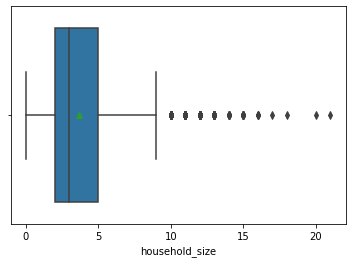

In [348]:
# Checking for Outliers
# Checking for outliers in the household size column

sns.boxplot(financial_df['household_size'], showmeans = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


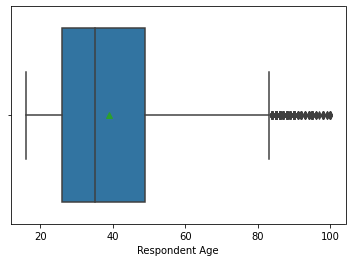

In [349]:
# Checking for Outliers
# Checking for outliers in the age column

sns.boxplot(financial_df['Respondent Age'], showmeans = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


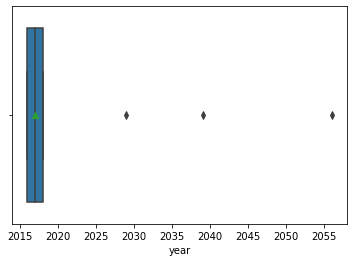

In [350]:
# Checking for Outliers
# Checking for outliers in the years column

sns.boxplot(financial_df['year'], showmeans = True)

In [351]:
#Let's remove the outliers in the years column

financial_df.drop(financial_df[financial_df['year'] > 2018].index, inplace=True)
financial_df

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [352]:
# Checking for Anomalies

#Let's check for missing values

financial_df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [353]:
#dropping the missing values
financial_df= financial_df.dropna()

In [354]:
#Checking to see if there are any missing values stil

financial_df.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [355]:
#Let's check for duplicate values 

financial_df.duplicated().value_counts()

False    23340
dtype: int64

There are no duplicates

In [356]:
#Let's drop the unnecessary columns
financial_df.drop(['The relathip with head', 'uniqueid'], axis = 1, inplace= True)
financial_df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,No,Rural,Yes,4.0,48.0,Female,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,No,Rural,Yes,2.0,27.0,Female,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,No,Rural,Yes,5.0,27.0,Female,Widowed,Primary education,Other Income
23522,Uganda,2018,No,Urban,Yes,7.0,30.0,Female,Divorced/Seperated,Secondary education,Self employed


In [357]:
#We shall then rename the column names to make them uniform
financial_df.columns = financial_df.columns.str.lower()
financial_df

,country,year,has a bank account,type of location,cell phone access,household_size,respondent age,gender_of_respondent,marital_status,level of educuation,type of job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,No,Rural,Yes,4.0,48.0,Female,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,No,Rural,Yes,2.0,27.0,Female,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,No,Rural,Yes,5.0,27.0,Female,Widowed,Primary education,Other Income
23522,Uganda,2018,No,Urban,Yes,7.0,30.0,Female,Divorced/Seperated,Secondary education,Self employed


In [358]:
# Viewing a sample of the dataset
financial_df.sample(15)

,country,year,has a bank account,type of location,cell phone access,household_size,respondent age,gender_of_respondent,marital_status,level of educuation,type of job
22355,Uganda,2018,No,Rural,Yes,3.0,25.0,Female,Married/Living together,Primary education,Self employed
3654,Kenya,2018,Yes,Urban,Yes,2.0,43.0,Male,Married/Living together,Primary education,Self employed
16956,Tanzania,2017,No,Urban,No,1.0,30.0,Female,Single/Never Married,Primary education,No Income
20551,Tanzania,2017,No,Urban,No,2.0,27.0,Female,Single/Never Married,Secondary education,Self employed
825,Kenya,2018,No,Rural,No,7.0,56.0,Female,Widowed,No formal education,Farming and Fishing
11133,Rwanda,2016,No,Rural,No,1.0,65.0,Female,Widowed,Primary education,Informally employed
19978,Tanzania,2017,No,Urban,No,1.0,71.0,Male,Married/Living together,Primary education,Informally employed
19932,Tanzania,2017,No,Rural,Yes,2.0,26.0,Female,Divorced/Seperated,Tertiary education,Formally employed Private
22446,Uganda,2018,No,Rural,No,2.0,81.0,Male,Married/Living together,Primary education,No Income
18219,Tanzania,2017,Yes,Rural,Yes,1.0,29.0,Male,Divorced/Seperated,Vocational/Specialised training,Remittance Dependent


In [359]:
financial_df.columns = ['country','year','has_a_bank_account','type_of_location','cell_phone_access','household_size','respondent_age',
'gender_of_respondent','marital_status','level_of_education','type_of_job']
financial_df.head()

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,marital_status,level_of_education,type_of_job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Single/Never Married,Primary education,Informally employed


## 6. Exploratory Data Analysis: Univariate Analysis



### a) Frequency Tables

In [360]:
#Frequency table for the household size

financial_df.household_size.value_counts().to_frame()

,household_size
2.0,5072
1.0,3928
3.0,3513
4.0,3199
5.0,2716
6.0,2028
7.0,1378
8.0,740
9.0,354
10.0,191


In [361]:
#Frequency table for respondent age

financial_df['respondent_age'].value_counts().to_frame()

,respondent_age
30.0,1043
35.0,831
25.0,785
28.0,742
32.0,707
...,...
100.0,5
93.0,4
96.0,3
99.0,2


In [362]:
#Frequency table for gender of respondents

financial_df['gender_of_respondent'].value_counts().to_frame()

,gender_of_respondent
Female,13766
Male,9574


In [363]:
#Frequency table for bank accounts

financial_df['has_a_bank_account'].value_counts().to_frame()

,has_a_bank_account
No,20044
Yes,3296


In [364]:
#Frequency table for cell phone access

financial_df['cell_phone_access'].value_counts().to_frame()

,cell_phone_access
Yes,17331
No,6009


In [365]:
#Frequency table for education level
financial_df['level_of_education'].value_counts().to_frame()


,level_of_education
Primary education,12688
No formal education,4467
Secondary education,4206
Tertiary education,1143
Vocational/Specialised training,801
6,27
Other/Dont know/RTA,8


In [366]:
#Frequency table for type of job
financial_df['type_of_job'].value_counts().to_frame()

,type_of_job
Self employed,6361
Informally employed,5549
Farming and Fishing,5422
Remittance Dependent,2508
Other Income,1077
Formally employed Private,1047
No Income,618
Formally employed Government,386
Government Dependent,247
Dont Know/Refuse to answer,125


In [367]:
# Frequency table for type of location

financial_df['type_of_location'].value_counts().to_frame()

,type_of_location
Rural,14263
Urban,9077


In [368]:
# Frequency table for the years in our dataset
financial_df['year'].value_counts().to_frame()

,year
2016,8683
2018,8157
2017,6500


In [369]:
# Checking the column names
financial_df.columns

Index(['country', 'year', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'marital_status', 'level_of_education',
       'type_of_job'],
      dtype='object')

### b) Histograms

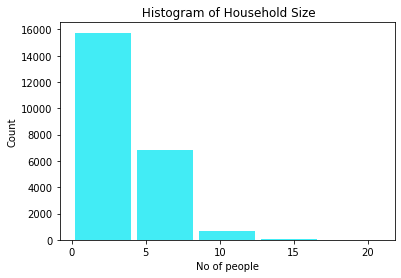

In [370]:
# Plotting a histogram for the household size

plt.hist(financial_df.household_size, bins = 5, histtype='bar', color = '#42ecf5', rwidth= 0.9)
plt.xlabel('No of people')
plt.ylabel('Count')
plt.title(' Histogram of Household Size')
plt.show()

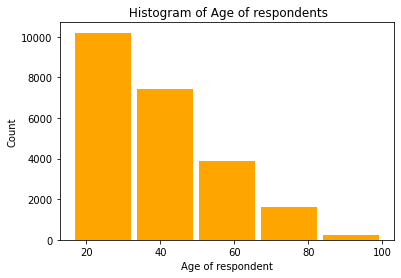

In [371]:
# Plotting the respondent age histogram

plt.hist(financial_df['respondent_age'], bins = 5, histtype='bar', color = 'orange', rwidth= 0.9)
plt.xlabel('Age of respondent')
plt.ylabel('Count')
plt.title(' Histogram of Age of respondents')
plt.show()

### c) Pie Charts

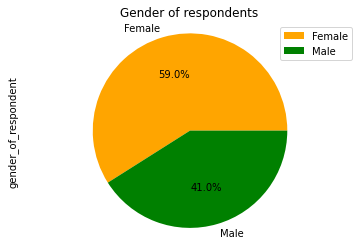

In [372]:
# Plotting a pie chart for the gender of respondents

financial_df['gender_of_respondent'].value_counts().plot(kind='pie',colors=['orange','green'], autopct='%1.1f%%')
plt.axis('equal')
plt.legend(loc='upper right')
plt.title('Gender of respondents')
plt.show()

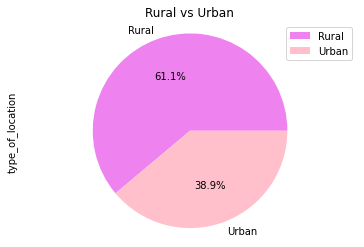

In [373]:
# Plotting a pie chart for the type of location

financial_df['type_of_location'].value_counts().plot(kind='pie',colors=['violet','pink'], autopct='%1.1f%%')
plt.axis('equal')
plt.legend(loc='upper right')
plt.title('Rural vs Urban')
plt.show()

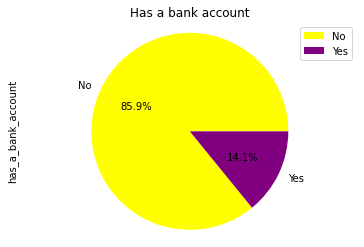

In [374]:
# Plotting a pie chart to see how many have bank accounts or not

financial_df['has_a_bank_account'].value_counts().plot(kind='pie',colors=['yellow','purple'], autopct='%1.1f%%')
plt.axis('equal')
plt.legend(loc='upper right')
plt.title('Has a bank account')
plt.show()

###  Measures of Central Tendency

#### a) Mean

In [375]:
# Calculating the mean for the respondent age
age = financial_df['respondent_age'].mean()

print("The mean is: \n", age)

The mean is: 
 38.80706940874036


In [376]:
# Calculating the mean for the household size

financial_df['household_size'].mean()


3.688560411311054

Most respondents are 30 years of age

#### b) Mode

In [377]:
# Finding the mode of the ages
financial_df['respondent_age'].mode()


0    30.0
dtype: float64

Most respondents are 30 years of age

In [378]:
# Finding the mode of the household size
financial_df['household_size'].mode()

0    2.0
dtype: float64

#### c) Median

In [379]:
# Calculating the median for the age

financial_df['respondent_age'].median()

35.0

In [380]:
# Calculating the median for the household size

financial_df['household_size'].median()

3.0

### Measures of Dispersion

#### a) Standard Deviation

In [381]:
# Calculating the standard deviation for household size

financial_df['household_size'].std()

2.2812745975350435

In [382]:
# Calculating the standard deviation for the respondent's age

financial_df['respondent_age'].std()

16.519904564514412

#### b) Variance

In [383]:
# Finding the variance for the household size

financial_df['household_size'].var()

5.204213789358675

In [384]:
# Finding the variance for the respondents age
financial_df['respondent_age'].var()

272.90724682066417

#### c) Range

In [385]:
#Calculating the range for the respondents age column

max = financial_df['respondent_age'].max()
min = financial_df['household_size'].min()

max-min

100.0

In [386]:
#Calculating the range for the household size column

max_size = financial_df['household_size'].max()
min_size = financial_df['household_size'].min()

max_size - min_size

21.0

#### d) Skewness

In [387]:
#Calculating the skewness for the household size and age columns

financial_df['household_size'].skew()

0.9741827150450616

Since the mean is greater than the mode, the distribution is skewed to the righti.e. the tail on the curve’s right-hand side is longer than the tail on the left-hand side, showing positive skewness.


In [388]:
financial_df['respondent_age'].skew()

0.8406145812311228

The age distribution is skewed to the right also. There is positive skewness when it comes to the respondents age.

#### e) Kurtosis

In [389]:
#Determining the kurtosis of the age and household size columns

financial_df['household_size'].kurt()

1.1538357462528523

In [390]:
financial_df['respondent_age'].kurt()

0.09826807013177241

The data is heavy tailed when compared to a normal distribution. This is called a leptokurtic distribution. This also goes to show that there are outliers in our dataset.

In [391]:
#Displaying the summary statistics of the dataframe

financial_df.describe()

,year,household_size,respondent_age
count,23340.000000,23340.000000,23340.000000
mean,2016.977464,3.688560,38.807069
std,0.849136,2.281275,16.519905
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


## 7. Exploratory Data Analysis: Bivariate Analysis

### 1. Numerical and numerical

#### Correlation

In [392]:
# Display the correlation coefficients of the variables in the Dataset
# Calculating the pearson coefficient

financial_df.corr() 

,year,household_size,respondent_age
year,1.000000,-0.052484,-0.018554
household_size,-0.052484,1.000000,-0.119671
respondent_age,-0.018554,-0.119671,1.000000


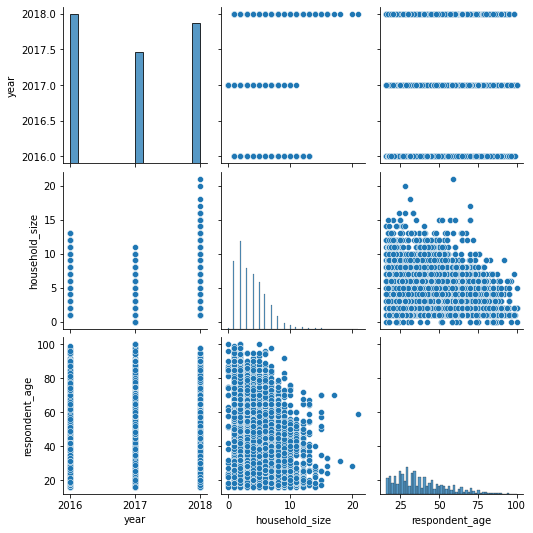

In [393]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(financial_df)
plt.show()

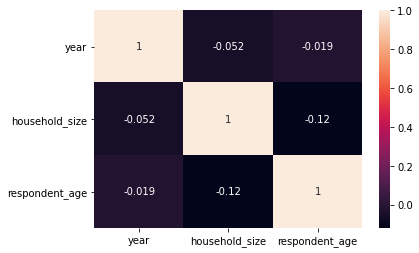

In [394]:
#Plotting a correlation matrix
sns.heatmap(financial_df.corr(),annot=True)
plt.show()

There's no clear
correlation between the house hold size, respondent age and years in the dataset

#### Scatter  Plots

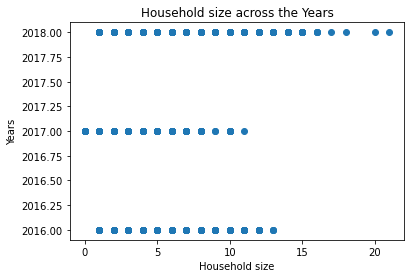

In [395]:
plt.scatter(financial_df['household_size'], financial_df['year'])
plt.title('Household size across the Years')
plt.xlabel('Household size')
plt.ylabel('Years')
plt.show()

### 2. Categorical and Categorical

#### Z Test

In [396]:
# Calculating the z - score for the household size and respondent age columns

from scipy import stats
stats.zscore(financial_df.household_size)

array([-0.30183791,  0.57488374,  0.57488374, ...,  0.57488374,
        1.4516054 ,  2.76668789])

In [397]:
from scipy import stats
stats.zscore(financial_df.respondent_age)

array([-0.89633609,  1.88824328, -0.77526742, ..., -0.71473308,
       -0.53313008, -1.13847342])

## 8. Exploratory Data Analysis : Multivariate Data Analysis

### Principal Component Analysis

In [398]:
# Changing Data Types
financial_df.type_of_location.replace(('Rural', 'Urban'), (1, 0), inplace=True)
financial_df.cell_phone_access.replace(('Yes', 'No'), (1, 0), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [399]:
# Preprocessing - divide the dataset into a feature set and corresponding labels.

x = financial_df.drop(columns = ['country','year','gender_of_respondent', 'marital_status','level_of_education','type_of_job','has_a_bank_account'])
y = financial_df['has_a_bank_account']

In [400]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [401]:
# Normalization - we will perform standard scalar normalization to normalize our feature set. 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [402]:
# Applying PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [403]:
# Explained Variance Ratio to return the variance caused by each of the principal components

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.33681713, 0.26564183, 0.22702806])

In [404]:
# Training and Making Predictions using Random Forest classification

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [405]:
# Performance Evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

#The random forest algorithm is able to correctly predict 4036 out of 4468 instances, resulting in 86.46% accuracy.

[[4036    0]
 [ 632    0]]
Accuracy 0.8646101113967438


## 9. Implementing the Solution

## 10. Challenging the Solution

In [408]:
# I will use Linear Discriminant Analysis to challenge this solution
# Preprocessing - divide the dataset into a feature set and corresponding labels.

x = financial_df.drop(columns = ['country','year','gender_of_respondent', 'marital_status','level_of_education','type_of_job','has_a_bank_account'])
y = financial_df['has_a_bank_account']

In [409]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [410]:
# Normalization - we will perform standard scalar normalization to normalize our feature set. 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [412]:
#Peforming LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(4, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [413]:
# Training and Making Predictions using Random Forest classification

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [414]:
# Performance Evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[4036    0]
 [ 632    0]]
Accuracy0.8646101113967438


## 11. Follow up Questions

### a). Did we have the right data?

The dataset would have been better if we had more numerical data. Most of it was categorical which had alot of restrictions on the number or types of analysis /visualizations to be plotted.



### b). Do we need other data to answer our question?

Yes we need more data for our analysis. It would be helpful if we had data on the population of the different classes or countries.

### c). Did we have the right question?

We had the right question because it helps to detect the client's probability to have or access a bank account. 